# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [71]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [72]:
titanic = pd.read_csv("/Users/juniorlinhares/Documents/labs/lab-matplotlib-seaborn/data/titanic.csv")
titanic.sample()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1093,1094,NaN,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C


#### Explore the titanic dataset using Pandas dtypes.

In [73]:
data_types = titanic.dtypes
data_types

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [75]:
titanic.select_dtypes(include='int64')

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


In [76]:
titanic.select_dtypes(include='float64')

,Survived,Age,Fare
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
...,...,...,...
1304,NaN,29.513190,8.0500
1305,NaN,39.000000,108.9000
1306,NaN,38.500000,7.2500
1307,NaN,29.513190,8.0500


In [77]:
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


In [78]:
numerical_variables = titanic.select_dtypes(include=['int64', 'float64'])
categorical_variables = titanic.select_dtypes(include=['object'])

print("Numerical Variables:")
print(numerical_variables.columns)

print("\nCategorical Variables:")
print(categorical_variables.columns)

Numerical Variables:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Categorical Variables:
Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

<Axes: >

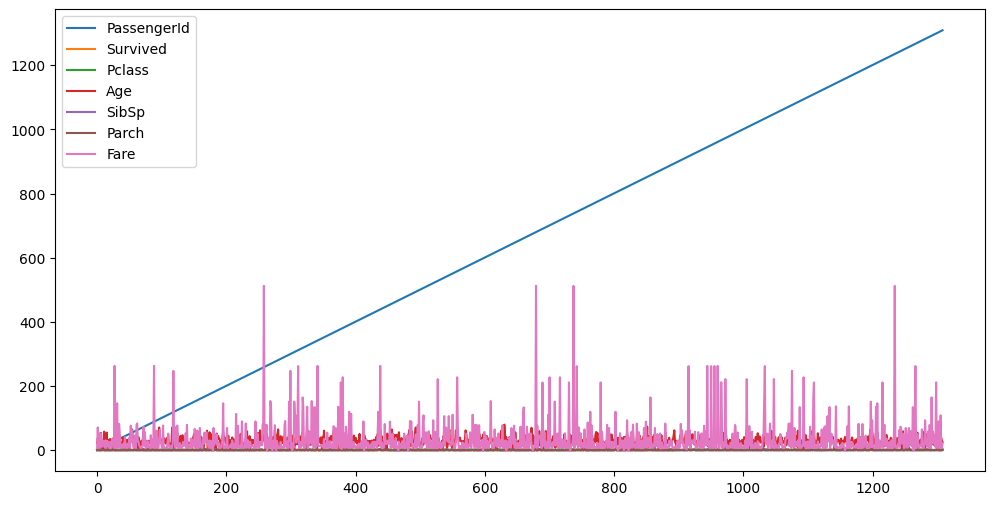

In [79]:
titanic.plot(figsize=(12,6))

#### Use the right visulalization to show the distribution of column `Age`.

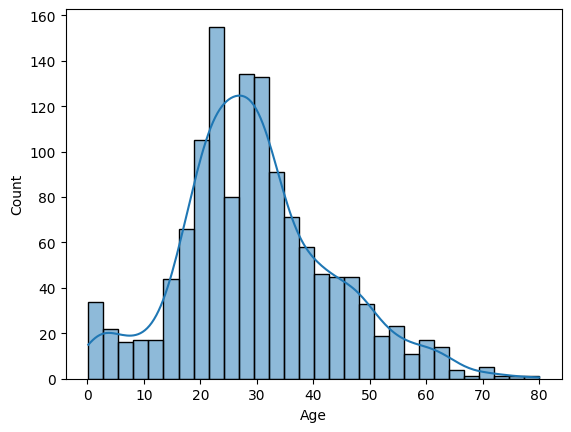

In [80]:
sns.histplot(data=titanic, x='Age', kde=True, bins=30);

#### How does the bin size affect your plot?

In [81]:
"""
# It affects the granularity of the representation of the data distribution.
# Determines how many bars or bins are used to group the data values within a certain range of values
"""

'\n# It affects the granularity of the representation of the data distribution.\n# Determines how many bars or bins are used to group the data values within a certain range of values\n'

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

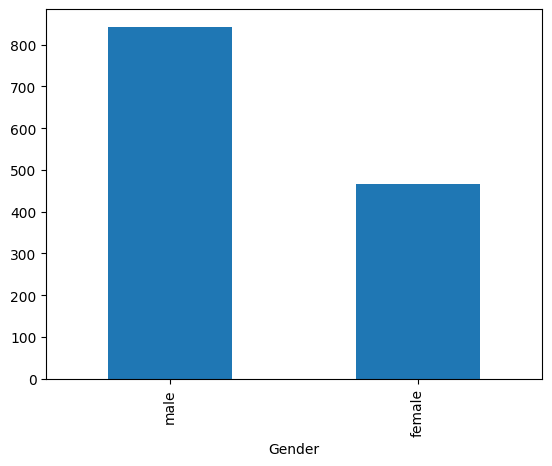

In [82]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind="bar");

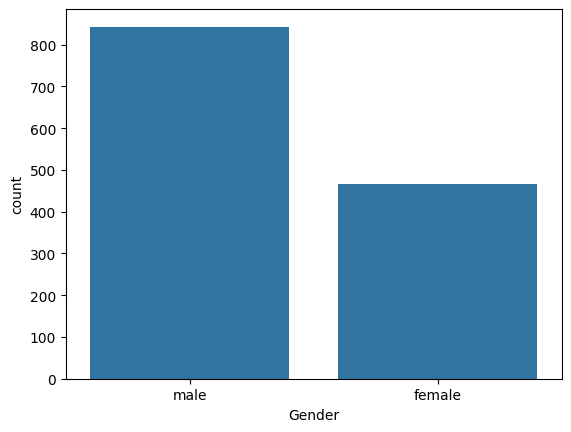

In [83]:
# Method 2 - seaborn
sns.countplot(x=titanic.Gender);

#### Use the right plot to visualize the column `Pclass`.

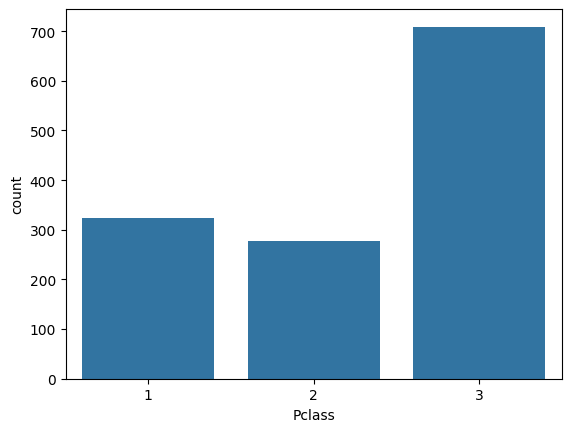

In [84]:
sns.countplot(data = titanic, x="Pclass");

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it and list all the info it's giving you.

[Hint](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

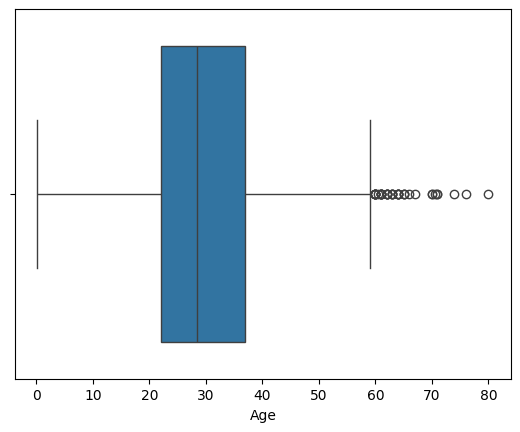

In [85]:
sns.boxplot(x="Age", data=titanic);

In [86]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

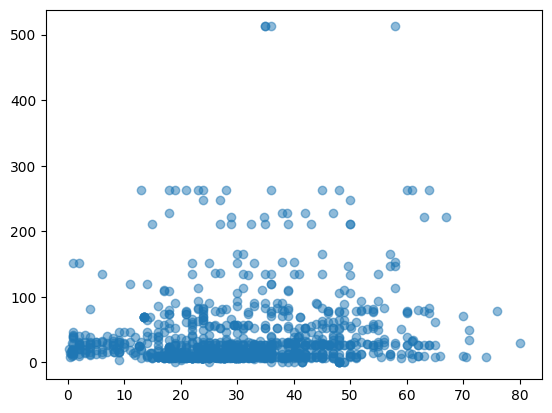

In [87]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5);

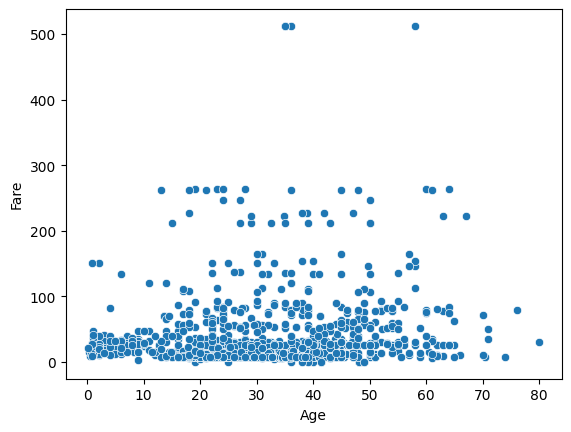

In [88]:
# Method 2 - seaborn
sns.scatterplot(x="Age", y="Fare", data=titanic);

#### Plot the correlation matrix using seaborn.

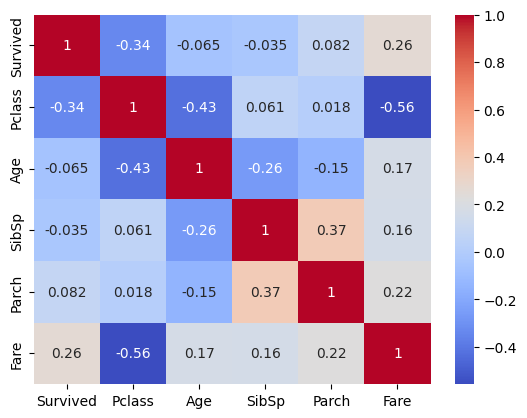

In [89]:
numerical_variables = titanic.select_dtypes(include=['int64', 'float64']).drop('PassengerId', axis=1)

correlation_matrix = numerical_variables.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

#### What are the most correlated features?

In [90]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

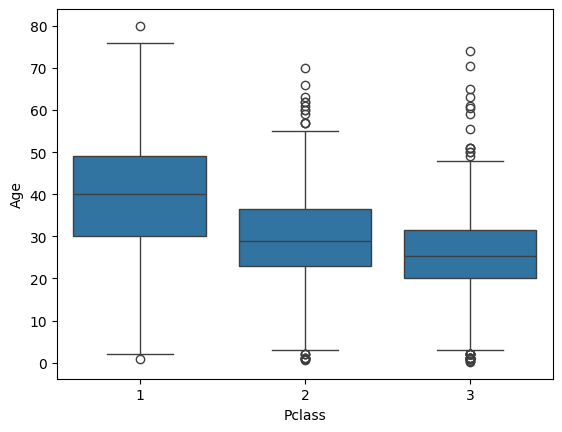

In [91]:
sns.boxplot(x='Pclass', y='Age', data=titanic);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

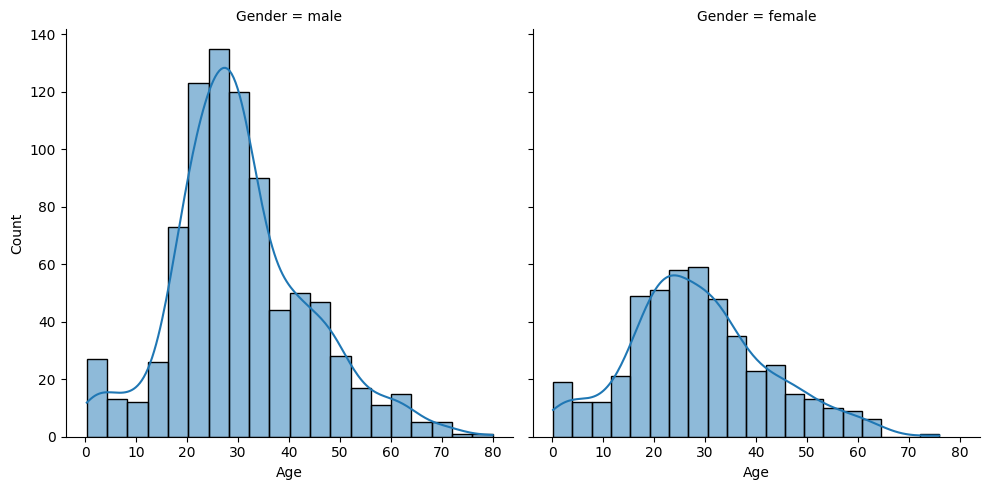

In [92]:
g = sns.FacetGrid(titanic, col="Gender", height=5, aspect=1)
g.map(sns.histplot, "Age", bins=20, kde=True)
g.set_axis_labels("Age", "Count")

plt.show()